In [1]:
import openmc
import openmc.mgxs as mgxs
import numpy as np
import scipy.constants as cons
model = openmc.Model()
materials = openmc.Materials.from_xml('../msbr/msbr-materials.xml')


model.materials = openmc.Materials([materials[0]])

bottom, top = [openmc.ZPlane(z0 = v, boundary_type = 'reflective') for v in [-1000,1000]] 
cyl = openmc.ZCylinder(r=900,boundary_type = 'reflective')
cell = openmc.Cell(name = 'core', fill = materials[0], region= -cyl & +bottom & -top)
uni = openmc.Universe(cells = [cell])
model.geometry.root_universe = uni

model.settings.particles = 1000
model.settings.batches = 100
model.settings.inactive = 50
model.settings.source = openmc.IndependentSource(space=openmc.stats.Box([-9, -9, -10], 
                                                                        [9, 9, 10]), constraints = {'fissionable':True})

groups = mgxs.EnergyGroups(group_edges=np.array([0., 20.0e6]))
fission = mgxs.FissionXS(domain=cell, energy_groups=groups, nu = False)
absorption = mgxs.AbsorptionXS(domain=cell, energy_groups=groups)

tallies = openmc.Tallies()
tallies += fission.tallies.values()
tallies += absorption.tallies.values()

model.tallies = tallies

model.run(output=False)

sp = openmc.StatePoint('statepoint.100.h5')

fission.load_from_statepoint(sp)
absorption.load_from_statepoint(sp)

sp.close()

fisxs = fission.get_pandas_dataframe()['mean'].values[0]
absxs = absorption.get_pandas_dataframe()['mean'].values[0]
flux = absorption.tallies['flux'].get_pandas_dataframe()['mean'].values[0]

/Users/nathanglaser/miniforge/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=1.
  warn(msg, IDWarning)
/Users/nathanglaser/miniforge/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=2.
  warn(msg, IDWarning)


In [ ]:
fisxs

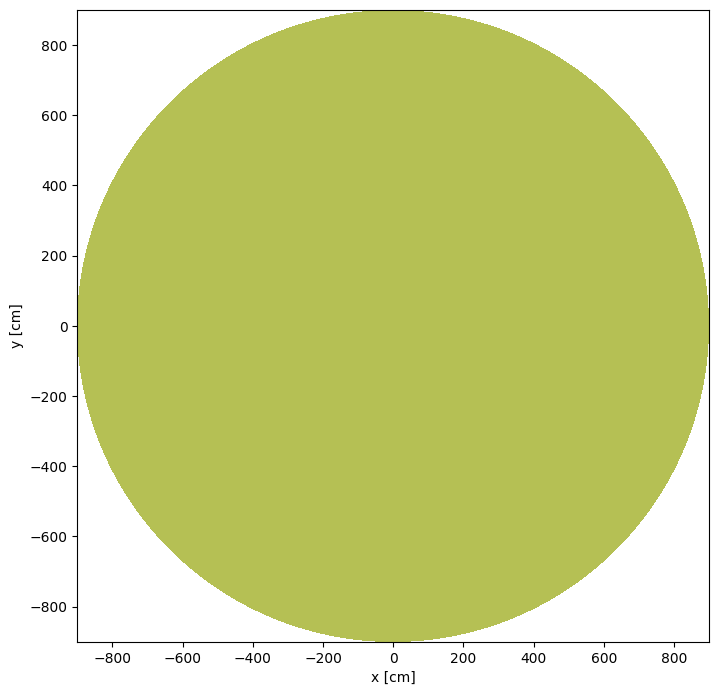

In [7]:
openmc.material.Material().add_nuclide()

Material
	ID             =	4
	Name           =	
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       